**Import required libraries**

In [ ]:
# Import necessary libraries

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import cross_val_score
import numpy as np

**Mount the Google Drive**

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load data from csv files**

In [ ]:
# Define file paths for the datasets
trainData = "/content/drive/MyDrive/wav2vec-layer-9/train.csv"
validData = "/content/drive/MyDrive/wav2vec-layer-9/valid.csv"
testData = "/content/drive/MyDrive/wav2vec-layer-9/test.csv"

# Load data into DataFrames

trainDataFrame = pd.read_csv(trainData)
validDataFrame= pd.read_csv(validData)
testDataFrame = pd.read_csv(testData)

In [ ]:
# drop ID column from the test dataset
X_test = testDataFrame.drop('ID', axis=1)

X_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.013112,0.130904,0.020284,0.063018,-0.034321,-0.073516,-0.030659,-0.064994,0.024153,0.082765,...,0.037803,0.241121,0.079949,-0.186099,-0.096718,0.126006,-0.023069,0.190374,0.146516,0.038047
1,0.005934,0.138592,-0.007000,0.055925,-0.021927,-0.084788,0.013339,0.060811,-0.011344,0.039792,...,-0.098701,0.042921,0.018571,-0.114785,-0.105186,0.059050,0.021443,0.013027,0.046826,-0.026682
2,-0.067210,0.078710,-0.044344,0.101248,-0.074331,-0.088951,0.074616,0.007231,0.021091,0.080092,...,0.029569,0.053370,0.096232,-0.369018,-0.066708,-0.003730,-0.063339,-0.044497,-0.024363,-0.042594
3,-0.005678,0.060703,0.033954,0.068771,-0.039923,-0.186583,0.014921,0.020791,0.017441,0.016184,...,-0.095406,0.018405,-0.018047,-0.080393,-0.114030,0.048255,0.033839,0.035026,-0.047988,-0.038252
4,-0.076360,0.061095,-0.004938,0.066692,-0.040454,-0.005141,-0.003213,0.025721,0.083558,0.005890,...,-0.003129,0.045479,0.057146,-0.194466,0.000739,0.018702,0.013192,-0.038486,0.033358,-0.038452


**Splitting the feature data based on different labels and Standardize features**

In [ ]:
labels = ['label_1', 'label_2', 'label_3', 'label_4']

# Initialize dictionaries to store data

X_train = {}
X_valid = {}
y_train = {}
y_valid = {}

# Loop through labels and perform preprocessing
for label in labels:
    scaler = StandardScaler()
    train_df = trainDataFrame
    validate_df = validDataFrame
    test_df = testDataFrame
    if label == 'label_2': # Remove NaN rows for label_2
      train_df = trainDataFrame[trainDataFrame[label].notna()]
      validate_df = validDataFrame[validDataFrame[label].notna()]


    # Standardize features
    X_train[label] = pd.DataFrame(scaler.fit_transform(train_df.iloc[:, :-4]))
    X_valid[label] = pd.DataFrame(scaler.transform(validate_df.iloc[:, :-4]))

    y_train[label] = train_df[label]
    y_valid[label] = validate_df[label]

In [ ]:
X_train['label_1']

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.732832,-0.333264,0.596066,0.199647,0.001732,-1.366840,0.018982,-0.907009,-0.545760,0.344283,...,-0.714937,0.647667,0.912589,-1.497318,0.296114,1.969895,1.824451,-1.368498,0.951164,-0.865829
1,1.365401,0.309508,-0.180983,-1.063048,-2.010105,-0.198219,0.789087,-0.739085,1.226836,1.389480,...,0.540657,1.810358,0.297038,-2.621136,1.036625,0.749089,0.591433,0.703918,0.043653,0.470734
2,0.730976,0.261710,0.806589,-1.419063,-1.164503,0.510101,-1.622114,0.538447,-0.571470,-1.056716,...,0.036815,-1.325684,1.215065,-0.528277,2.344495,-1.033915,0.063473,-1.395501,-1.074788,0.997659
3,1.792272,-0.560797,-0.063261,1.355869,0.185144,-0.415675,1.135241,1.529019,0.722632,1.736781,...,-0.948772,0.511970,-1.628660,0.288570,-0.877292,-3.326587,-0.783595,1.160318,-0.268674,-2.423979
4,0.931559,1.914751,-0.497062,-0.179456,0.634145,-1.035922,0.287839,1.079932,-1.051541,-0.964441,...,-0.771970,-1.134301,0.181301,-1.035314,-0.882144,0.497965,1.569586,-1.120745,0.716674,-1.274995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,-0.531084,4.823652,-0.690078,2.931728,-2.889276,-0.410107,-2.777668,-1.848824,-1.757688,-2.644168,...,-1.912513,-1.533322,1.809770,1.577667,4.593500,-4.287958,-0.913250,-3.457048,-6.859236,1.911460
28516,-0.839453,-0.288817,0.100349,-0.250621,1.000792,0.921216,1.273201,-0.503749,-0.090243,-0.009092,...,-0.454032,-1.030528,-0.781913,-1.157639,0.825222,0.325432,-0.800824,-0.731976,-0.837234,-0.023310
28517,0.734072,1.542696,0.798632,-0.611055,-0.087593,0.241458,0.238060,-0.996183,1.737493,1.552639,...,-0.992649,-0.681014,0.352801,0.377122,0.962462,-0.024135,-0.552911,0.178693,0.229336,-0.527887
28518,-0.575220,0.183033,0.484755,0.808226,-0.355355,-1.317169,-0.720143,-0.221078,-0.212898,-0.416933,...,-0.073463,-0.608837,-0.469561,0.406492,-0.533204,1.715348,0.562830,-0.205429,-0.050568,-1.479640


**Support Vector Classifire**

In [ ]:
def support_vector_model(label_name, training_data, validation_data, training_labels, validation_labels):
    model = SVC(kernel='linear')
    model.fit(training_data[label_name], training_labels[label_name])
    labelPredictions = model.predict(validation_data[label_name])
    print(f"+ Accuracy Score for {label_name} = {accuracy_score(validation_labels[label_name], labelPredictions)}")

**Weighted Support Vector Classifire**

In [ ]:
def weighted_support_vector_model(label_name, training_data, validation_data, training_labels, validation_labels):
  model = SVC(kernel='linear', class_weight='balanced')
  model.fit(training_data[label_name], training_labels[label_name])
  labelPredictions = model.predict(validation_data[label_name])
  print(f"+ Accuracy Score for {label_name} = {accuracy_score(validation_labels[label_name], labelPredictions)}")

**Random Search for Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def perform_random_search(model, param_distribution, X_train, y_train):

    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distribution, scoring='accuracy', n_iter=5, cv=2, n_jobs=-1, verbose=2)

    # Perform the random search
    random_search.fit(X_train, y_train)

    # Get the best model and best parameters
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    return best_model, best_params

**Cross Validation**

In [ ]:
def cross_validation(model, k_value, X, y):

    scores = cross_val_score(model, X, y, cv=k_value)
    mean_score = np.mean(scores)
    std_deviation = np.std(scores)
    print("Cross-Validation Scores:", scores)
    print("Mean Score:", mean_score)
    print("Standard Deviation:", std_deviation)

# Label 01

<Axes: xlabel='label_1', ylabel='count'>

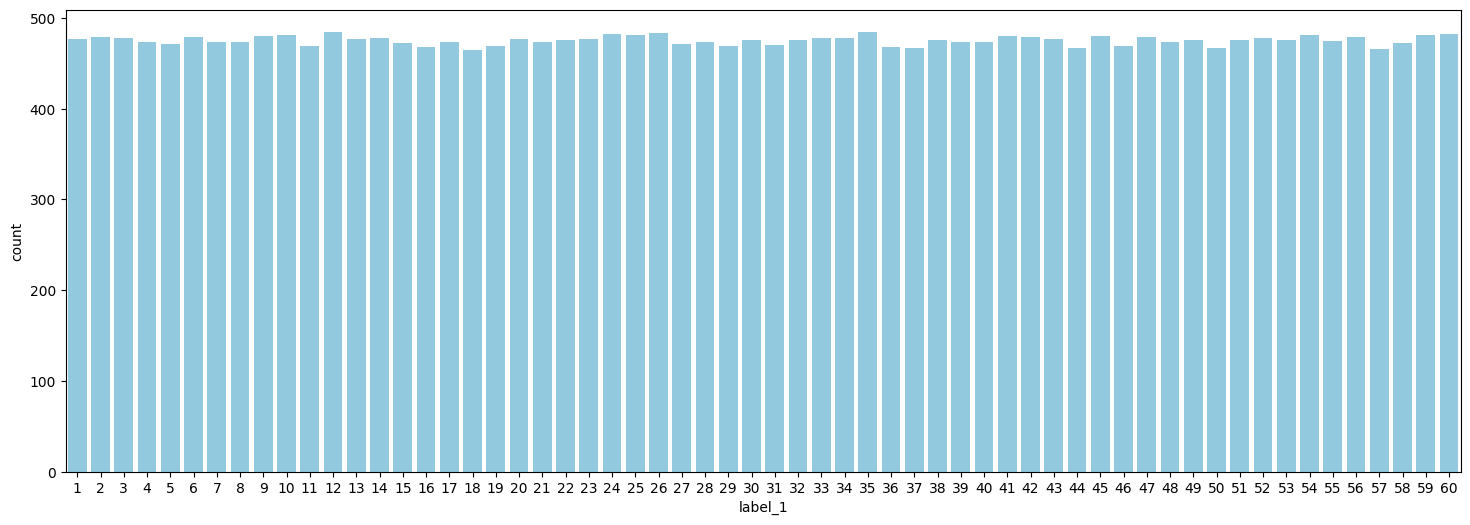

In [ ]:
plt.figure(figsize=(18,6))
sn.countplot(data=y_train, x = 'label_1', color = 'skyblue')

**Testing the performance of the initial dataset after data standardization using evaluation metrics**

In [ ]:
support_vector_model('label_1', X_train, X_valid, y_train, y_valid)

+ Accuracy Score for label_1 = 0.96


**K best method for feature selection**

In [ ]:
# Number of new features
new_features = 560
selector = SelectKBest(f_classif, k=new_features)


In [ ]:

# Initialize dictionaries for selected features
X_train_selected = {}
X_valid_selected = {}
X_test_selected_l1 = X_test.copy()

X_train_selected['label_1'] = pd.DataFrame(selector.fit_transform(X_train['label_1'], y_train['label_1']))
X_valid_selected['label_1'] = pd.DataFrame(selector.transform(X_valid['label_1']))
X_test_selected_l1 = pd.DataFrame(selector.transform(X_test_selected_l1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


**Evaluating accuracy after the process of selecting relevant features using K-Best**

In [ ]:
support_vector_model('label_1', X_train_selected, X_valid_selected, y_train, y_valid)

+ Accuracy Score for label_1 = 0.9613333333333334


**Principal Component Analysis for feature selection**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, svd_solver='full')

# Initialize dictionaries for selected features
X_train_pca_selected = {}
X_valid_pca_selected = {}
X_test_pca_selected_l1 = X_test.copy()

X_train_pca_selected['label_1'] = pd.DataFrame(pca.fit_transform(X_train['label_1']))
X_valid_pca_selected['label_1'] = pd.DataFrame(pca.transform(X_valid['label_1']))
X_test_pca_selected_l1 = pd.DataFrame(pca.transform(X_test_pca_selected_l1))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


**Evaluating accuracy after the process of selecting relevant features using PCA**

In [ ]:
support_vector_model('label_1', X_train_pca_selected, X_valid_pca_selected, y_train, y_valid)

+ Accuracy Score for label_1 = 0.956


**Cross Validation**

In [ ]:
model = SVC(kernel= 'linear', gamma= 0.001, C= 1.0)
cross_validation(model, 5, X_train['label_1'], y_train['label_1'])

Cross-Validation Scores: [0.95213885 0.95021038 0.94670407 0.94652875 0.95091164]
Mean Score: 0.9492987377279102
Standard Deviation: 0.0022761335718257513


**Hyperparameter Tuning**

In [ ]:
param_distribution = {
    'C': [100,10,1,0.1,0.01,0.001],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

In [ ]:
best_model_l1, best_params_l1 = perform_random_search(SVC(), param_distribution, X_train_selected['label_1'], y_train['label_1'])

Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [ ]:
best_model_l1

SVC(C=0.1, gamma=0.1, kernel='linear')

In [ ]:
best_params_l1

{'kernel': 'linear', 'gamma': 0.1, 'C': 0.1}

In [ ]:
# best_model.fit(X_train_selected_l1['label_1'], y_train['label_1'])
y_predicition_label_1 = best_model_l1.predict(X_valid_selected['label_1'])
print(f"+ Accuracy Score for label_1 using best model with hyper parameter tuning = {accuracy_score(y_valid['label_1'], y_predicition_label_1)}")

+ Accuracy Score for label_1 using best model with hyper parameter tuning = 0.9613333333333334


# Label 02

<Axes: xlabel='label_2', ylabel='count'>

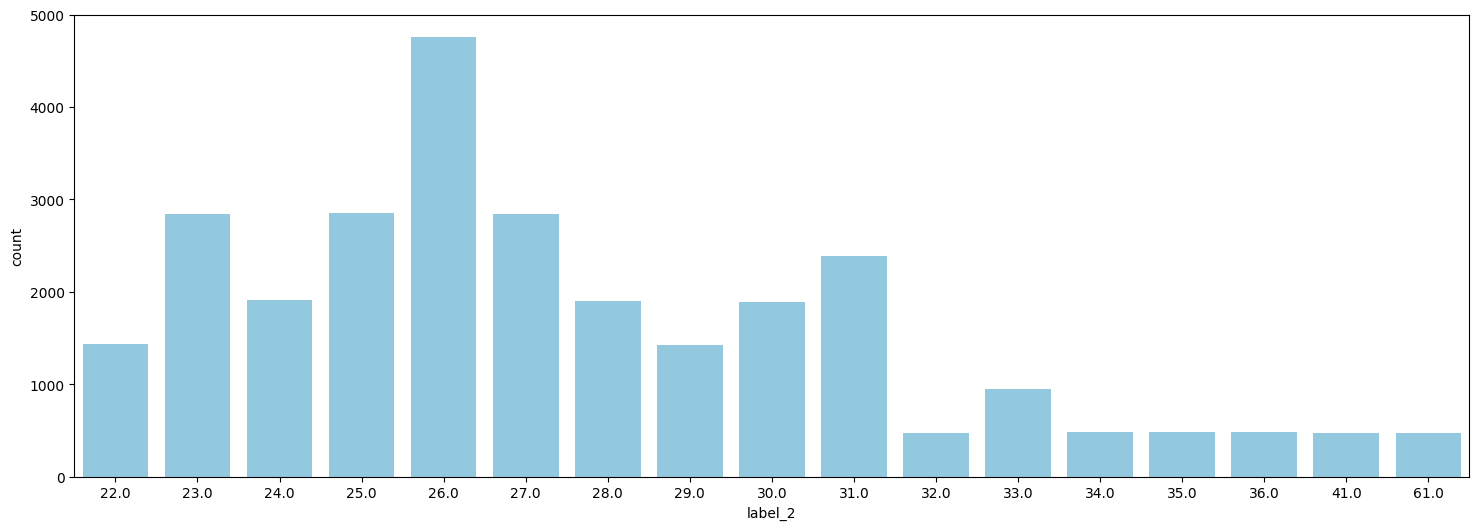

In [ ]:
plt.figure(figsize=(18,6))
sn.countplot(data=y_train, x = 'label_2', color = 'skyblue')

**Testing the performance of the initial dataset after data standardization using evaluation metrics**

In [ ]:
weighted_support_vector_model('label_2', X_train, X_valid, y_train, y_valid)

+ Accuracy Score for label_2 = 0.8097826086956522


**K best method for feature selection**

In [ ]:
# Number of new features
new_features = 560
selector = SelectKBest(f_classif, k=new_features)


In [ ]:

# Initialize dictionaries for selected features
X_train_selected = {}
X_valid_selected = {}
X_test_selected_l2 = X_test.copy()

X_train_selected['label_2'] = pd.DataFrame(selector.fit_transform(X_train['label_2'], y_train['label_2']))
X_valid_selected['label_2'] = pd.DataFrame(selector.transform(X_valid['label_2']))
X_test_selected_l2 = pd.DataFrame(selector.transform(X_test_selected_l2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


**Evaluating accuracy after the process of selecting relevant features using K-Best**

In [ ]:
weighted_support_vector_model('label_2', X_train_selected, X_valid_selected, y_train, y_valid)

+ Accuracy Score for label_2 = 0.7961956521739131


**Principal Component Analysis for feature selection**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, svd_solver='full')

# Initialize dictionaries for selected features
X_train_pca_selected = {}
X_valid_pca_selected = {}
X_test_pca_selected_l2 = X_test.copy()

X_train_pca_selected['label_2'] = pd.DataFrame(pca.fit_transform(X_train['label_2']))
X_valid_pca_selected['label_2'] = pd.DataFrame(pca.transform(X_valid['label_2']))
X_test_pca_selected_l2 = pd.DataFrame(pca.transform(X_test_pca_selected_l2))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


**Evaluating accuracy after the process of selecting relevant features using PCA**

In [ ]:
weighted_support_vector_model('label_2', X_train_pca_selected, X_valid_pca_selected, y_train, y_valid)

+ Accuracy Score for label_2 = 0.811141304347826


**Cross Validation**

In [ ]:
model = SVC(kernel= 'linear', gamma= 0.001, C= 1.0)
cross_validation(model, 5, X_train['label_2'], y_train['label_2'])

Cross-Validation Scores: [0.3910485  0.56187589 0.60859486 0.60021398 0.43937233]
Mean Score: 0.5202211126961485
Standard Deviation: 0.08850535484585233


**Hyperparameter Tuning**

In [ ]:
param_distribution = {
    'C': [100,10,1,0.1,0.01,0.001],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'class_weight': ['balanced', None]
}

In [ ]:
best_model_l2, best_params_l2 = perform_random_search(SVC(), param_distribution, X_train_pca_selected['label_2'], y_train['label_2'])

Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [ ]:
best_model_l2

SVC(C=0.01, gamma=1, kernel='linear')

In [ ]:
best_params_l2

{'kernel': 'linear', 'gamma': 1, 'class_weight': None, 'C': 0.01}

In [ ]:
# best_model.fit(X_train_selected_l1['label_1'], y_train['label_1'])
y_predicition_label_2 = best_model_l2.predict(X_valid_pca_selected['label_2'])
print(f"+ Accuracy Score for label_1 using best model with hyper parameter tuning = {accuracy_score(y_valid['label_2'], y_predicition_label_2)}")

+ Accuracy Score for label_1 using best model with hyper parameter tuning = 0.8301630434782609


# Label 03

<Axes: xlabel='label_3', ylabel='count'>

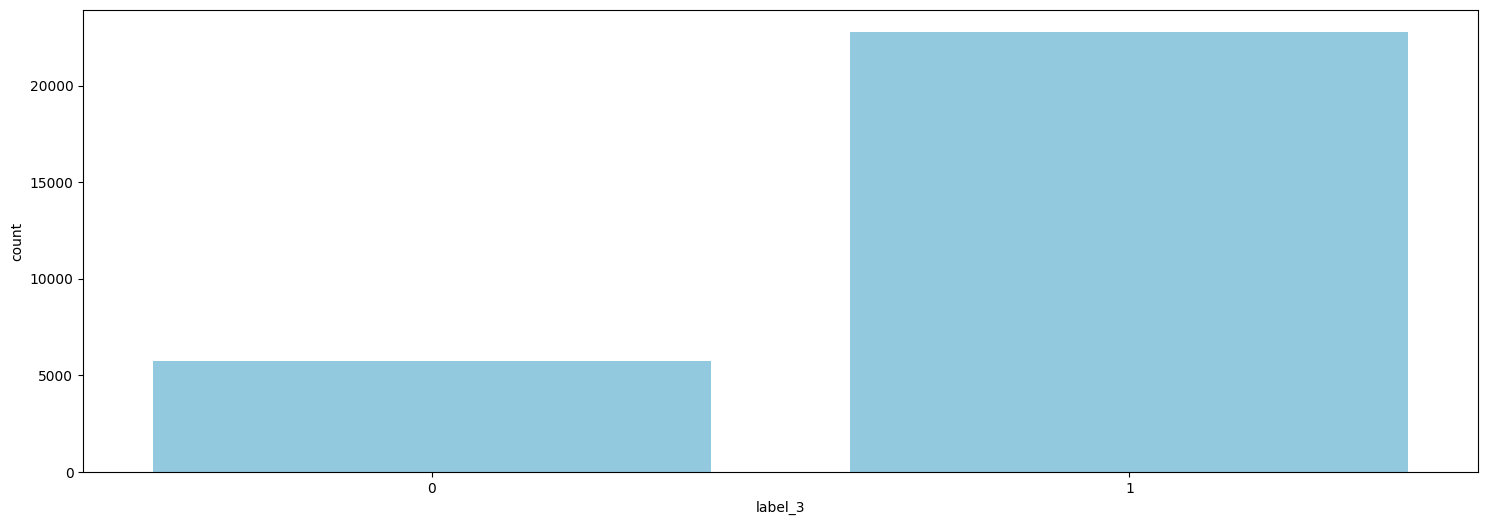

In [ ]:
plt.figure(figsize=(18,6))
sn.countplot(data=y_train, x = 'label_3', color = 'skyblue')

**Testing the performance of the initial dataset after data standardization using evaluation metrics**

In [ ]:
weighted_support_vector_model('label_3', X_train, X_valid, y_train, y_valid)

+ Accuracy Score for label_3 = 0.992


**K best method for feature selection**

In [ ]:
# Number of new features
new_features = 560
selector = SelectKBest(f_classif, k=new_features)


In [ ]:

# Initialize dictionaries for selected features
X_train_selected = {}
X_valid_selected = {}
X_test_selected_l3 = X_test.copy()

X_train_selected['label_3'] = pd.DataFrame(selector.fit_transform(X_train['label_3'], y_train['label_3']))
X_valid_selected['label_3'] = pd.DataFrame(selector.transform(X_valid['label_3']))
X_test_selected_l3 = pd.DataFrame(selector.transform(X_test_selected_l3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


**Evaluating accuracy after the process of selecting relevant features using K-Best**

In [ ]:
weighted_support_vector_model('label_3', X_train_selected, X_valid_selected, y_train, y_valid)

+ Accuracy Score for label_3 = 0.992


**Principal Component Analysis for feature selection**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, svd_solver='full')

# Initialize dictionaries for selected features
X_train_pca_selected = {}
X_valid_pca_selected = {}
X_test_pca_selected_l3 = X_test.copy()

X_train_pca_selected['label_3'] = pd.DataFrame(pca.fit_transform(X_train['label_3']))
X_valid_pca_selected['label_3'] = pd.DataFrame(pca.transform(X_valid['label_3']))
X_test_pca_selected_l3 = pd.DataFrame(pca.transform(X_test_pca_selected_l3))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


**Evaluating accuracy after the process of selecting relevant features using PCA**

In [ ]:
weighted_support_vector_model('label_3', X_train_pca_selected, X_valid_pca_selected, y_train, y_valid)

+ Accuracy Score for label_3 = 0.9893333333333333


**Cross Validation**

In [ ]:
model = SVC(kernel= 'linear', gamma= 0.001, C= 1.0)
cross_validation(model, 5, X_train_selected['label_3'], y_train['label_3'])

Cross-Validation Scores: [0.97019635 0.99421459 0.98053997 0.98439691 0.99333801]
Mean Score: 0.9845371669004208
Standard Deviation: 0.00886299526998978


**Hyperparameter Tuning**

In [ ]:
param_distribution = {
    'C': [100,10,1,0.1,0.01,0.001],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'class_weight': ['balanced'],
}

In [ ]:
best_model_l3, best_params_l3 = perform_random_search(SVC(), param_distribution, X_train_selected['label_3'], y_train['label_3'])

Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [ ]:
best_model_l3

SVC(C=100, class_weight='balanced', gamma=0.001)

In [ ]:
best_params_l3

{'kernel': 'rbf', 'gamma': 0.001, 'class_weight': 'balanced', 'C': 100}

In [ ]:
y_predicition_label_3 = best_model_l3.predict(X_valid_selected['label_3'])
print(f"+ Accuracy Score for label_1 using best model with hyper parameter tuning = {accuracy_score(y_valid['label_3'], y_predicition_label_3)}")

+ Accuracy Score for label_1 using best model with hyper parameter tuning = 0.996


# Label 04

<Axes: xlabel='label_4', ylabel='count'>

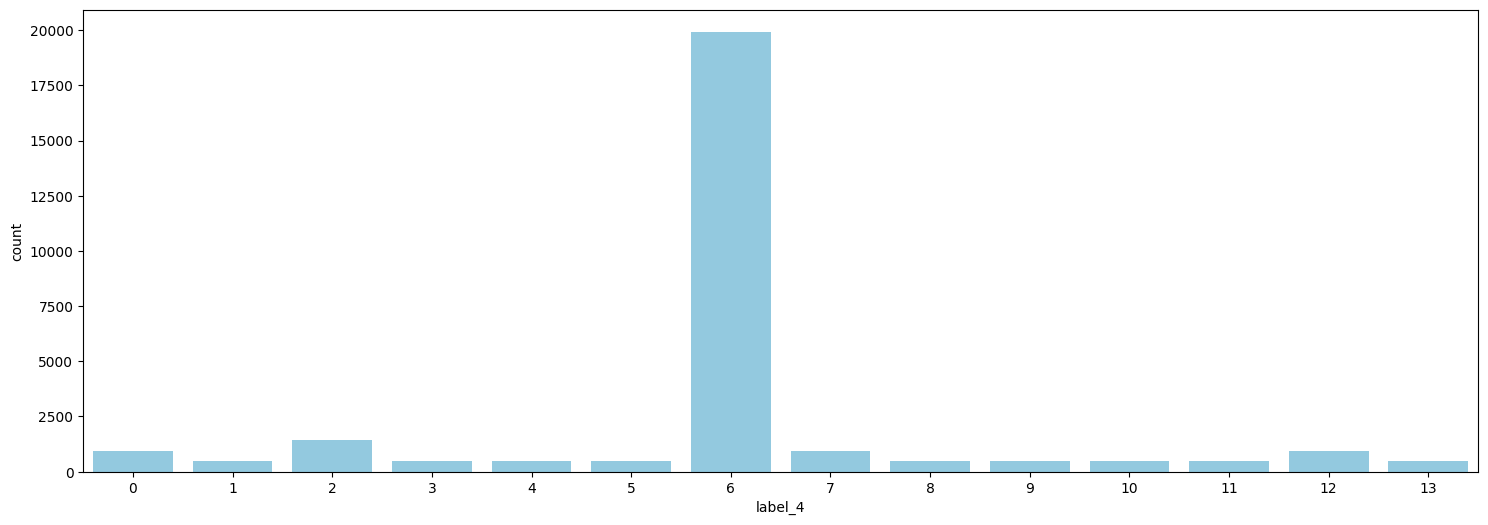

In [ ]:
plt.figure(figsize=(18,6))
sn.countplot(data=y_train, x = 'label_4', color = 'skyblue')

**Testing the performance of the initial dataset after data standardization using evaluation metrics**

In [ ]:
weighted_support_vector_model('label_4', X_train, X_valid, y_train, y_valid)

+ Accuracy Score for label_4 = 0.9413333333333334


**K best method for feature selection**

In [ ]:
# Number of new features
new_features = 560
selector = SelectKBest(f_classif, k=new_features)


In [ ]:

# Initialize dictionaries for selected features
X_train_selected = {}
X_valid_selected = {}
X_test_selected_l4 = X_test.copy()

X_train_selected['label_4'] = pd.DataFrame(selector.fit_transform(X_train['label_4'], y_train['label_4']))
X_valid_selected['label_4'] = pd.DataFrame(selector.transform(X_valid['label_4']))
X_test_selected_l4 = pd.DataFrame(selector.transform(X_test_selected_l4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


**Evaluating accuracy after the process of selecting relevant features using K-Best**

In [ ]:
weighted_support_vector_model('label_4', X_train_selected, X_valid_selected, y_train, y_valid)

+ Accuracy Score for label_4 = 0.9213333333333333


**Principal Component Analysis for feature selection**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.97, svd_solver='full')

# Initialize dictionaries for selected features
X_train_pca_selected = {}
X_valid_pca_selected = {}
X_test_pca_selected_l4 = X_test.copy()

X_train_pca_selected['label_4'] = pd.DataFrame(pca.fit_transform(X_train['label_4']))
X_valid_pca_selected['label_4'] = pd.DataFrame(pca.transform(X_valid['label_4']))
X_test_pca_selected_l4 = pd.DataFrame(pca.transform(X_test_pca_selected_l4))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


**Evaluating accuracy after the process of selecting relevant features using PCA**

In [ ]:
weighted_support_vector_model('label_4', X_train_pca_selected, X_valid_pca_selected, y_train, y_valid)

+ Accuracy Score for label_4 = 0.9053333333333333


**Hyperparameter Tuning**

In [ ]:
param_distribution = {
    'C': [100,10,1,0.1,0.01,0.001],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'class_weight': ['balanced'],
}

In [ ]:
best_model_l4, best_params_l4 = perform_random_search(SVC(), param_distribution, X_train_selected['label_4'], y_train['label_4'])

Fitting 2 folds for each of 5 candidates, totalling 10 fits


In [ ]:
best_model_l4

In [ ]:
best_params_l4

In [ ]:
y_predicition_label_4 = best_model_l4.predict(X_valid_selected['label_4'])
print(f"+ Accuracy Score for label_4 using best model with hyper parameter tuning = {accuracy_score(y_valid['label_4'], y_predicition_label_4)}")

**Cross Validation**

In [ ]:
model = SVC(kernel= 'linear', gamma= 0.001, C= 1.0)
cross_validation(model, 5, X_train_selected['label_4'], y_train['label_4'])

# Generating CSV file

In [ ]:
# Make predictions for each label using the best models
l1_prediction = best_model_l1.predict(X_test_selected_l4)  # Predictions for label_1
l2_prediction = best_model_l2.predict(X_test_selected_l4)  # Predictions for label_2
l3_prediction = best_model_l3.predict(X_test_selected_l4)  # Predictions for label_3
l4_prediction = best_model_l4.predict(X_test_selected_l4)  # Predictions for label_4

# Extract the 'ID' column from the test data for result reporting
Ids = testDataFrame['ID']

# Create a dictionary to store the results
results = {
    'ID': Ids,          # Store the 'ID' column
    'label_1': l1_prediction,  # Predicted values for label_1
    'label_2': l2_prediction,  # Predicted values for label_2
    'label_3': l3_prediction,  # Predicted values for label_3
    'label_4': l4_prediction   # Predicted values for label_4
}

# Create a DataFrame to organize the results
resultDataFrame = pd.DataFrame(results)

# Save the results to a CSV file ('layer_9.csv') without the index column
resultDataFrame.to_csv('layer_9.csv', index=False)
